In [0]:
# Import necessary modules

import torch
import torchvision as tv
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torchvision.utils import save_image

# Loading and Transforming data

transform = transforms.Compose([transforms.ToTensor(),  transforms.Normalize((0.4914, 0.4822, 0.4466), (0.247,            0.243, 0.261))])
trainTransform  = tv.transforms.Compose([tv.transforms.ToTensor(), tv.transforms.Normalize((0.4914, 0.4822, 0.4466), (0.247, 0.243, 0.261))])
trainset = tv.datasets.CIFAR10(root='./data',  train=True,download=True, transform=transform)
dataloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=False, num_workers=4)
testset = tv.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)



Files already downloaded and verified
Files already downloaded and verified


In [0]:
# Creating the model

class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder,self).__init__()
        
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 6, kernel_size=5),
            nn.ReLU(True),
            nn.Conv2d(6,16,kernel_size=5),
            nn.ReLU(True))
        self.decoder = nn.Sequential(             
            nn.ConvTranspose2d(16,6,kernel_size=5),
            nn.ReLU(True),
            nn.ConvTranspose2d(6,3,kernel_size=5),
            nn.ReLU(True))
    def forward(self,x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Defining some parameters

num_epochs = 10 
batch_size = 128
model = Autoencoder().cpu()
distance = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),weight_decay=1e-5)



In [0]:
# Training the model

for epoch in range(num_epochs):
    for data in dataloader:
        img, _ = data
        img = Variable(img).cpu()
        # ===================forward=====================
        output = model(img)
        loss = distance(output, img)
        # ===================backward====================
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # ===================log========================
    print('epoch [{}/{}], loss:{:.4f}'.format(epoch+1, num_epochs, loss.item()))

epoch [1/10], loss:0.3170
epoch [2/10], loss:0.3030
epoch [3/10], loss:0.2980
epoch [4/10], loss:0.3100
epoch [5/10], loss:0.2942
epoch [6/10], loss:0.2925
epoch [7/10], loss:0.2984
epoch [8/10], loss:0.2902
epoch [9/10], loss:0.2892
epoch [10/10], loss:0.2888


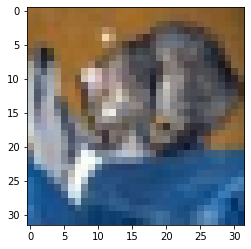

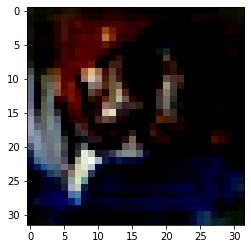

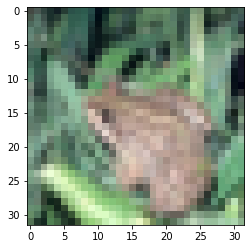

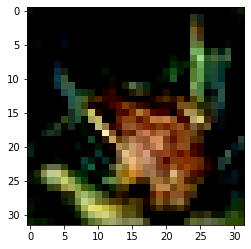

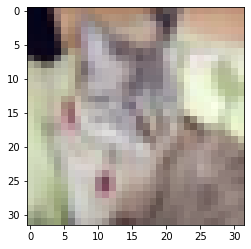

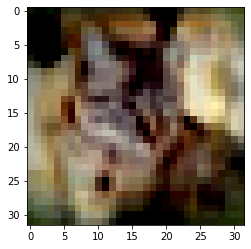

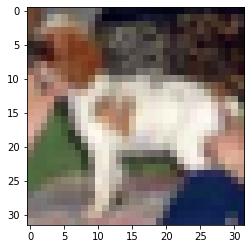

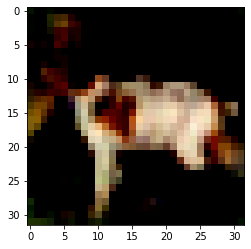

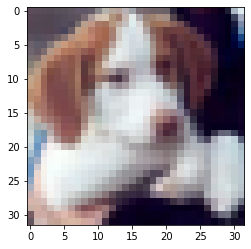

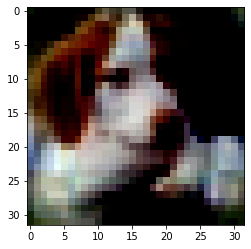

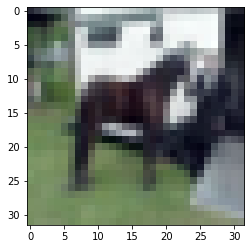

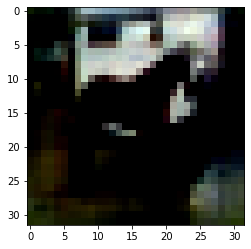

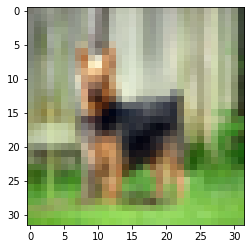

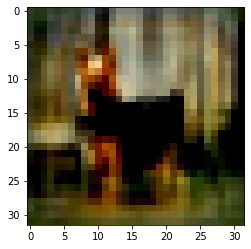

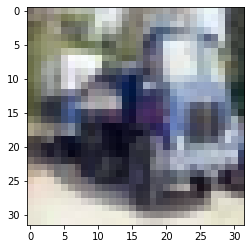

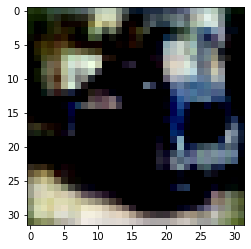

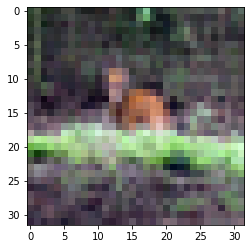

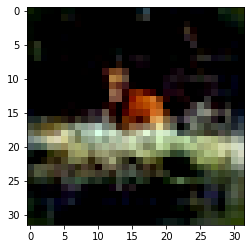

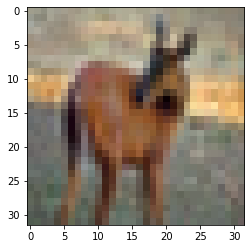

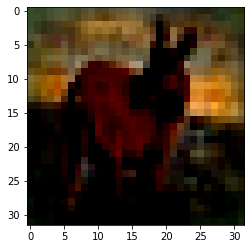

KeyboardInterrupt: ignored

In [0]:
# Visualizing the results

import numpy as np
import IPython.display
import PIL
import matplotlib.pyplot as plt

for data in testloader:
    img, _ = data
    img = Variable(img).cpu()
    output = model(img)

    img=img[0].permute(1,2,0)
    img -= img.min()
    img /= img.max()
    plt.imshow(img)
    plt.show()

    output_img=output[0].permute(1,2,0)
    output_img -= output_img.min()
    output_img /= output_img.max()
    arr_ = np.squeeze(output_img)
    arr_=arr_.detach().numpy()
    plt.imshow(arr_)
    plt.show()

    
    


    